# LAB | Hyperparameter Tuning

**Load the data**

Finally step in order to maximize the performance on your Spaceship Titanic model.

The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

So far we've been training and evaluating models with default values for hyperparameters.

Today we will perform the same feature engineering as before, and then compare the best working models you got so far, but now fine tuning it's hyperparameters.

In [2]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Now perform the same as before:
- Feature Scaling
- Feature Selection


In [4]:
#From previous labs 
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
spaceship.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
#Drop Nulls
spaceship.dropna(inplace=True)

In [7]:
# Extract the first letter of the Cabin and replace NaN values with 'Unknown'
spaceship['Cabin'] = spaceship['Cabin'].str[0].fillna('Unknown')

In [8]:
# Drop PassengerId and Name columns from spaceship DataFrame
spaceship = spaceship.drop(['PassengerId', 'Name'], axis=1)

# Display the updated DataFrame
print(spaceship.head())

  HomePlanet CryoSleep Cabin  Destination   Age    VIP  RoomService  \
0     Europa     False     B  TRAPPIST-1e  39.0  False          0.0   
1      Earth     False     F  TRAPPIST-1e  24.0  False        109.0   
2     Europa     False     A  TRAPPIST-1e  58.0   True         43.0   
3     Europa     False     A  TRAPPIST-1e  33.0  False          0.0   
4      Earth     False     F  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
0        0.0           0.0     0.0     0.0        False  
1        9.0          25.0   549.0    44.0         True  
2     3576.0           0.0  6715.0    49.0        False  
3     1283.0         371.0  3329.0   193.0        False  
4       70.0         151.0   565.0     2.0         True  


In [9]:
# Create dummy variables for non-numerical columns
spaceship = pd.get_dummies(spaceship, columns=spaceship.select_dtypes(include=['object']).columns, drop_first=True)

# Display the updated DataFrame
print(spaceship.head())

    Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Transported  \
0  39.0          0.0        0.0           0.0     0.0     0.0        False   
1  24.0        109.0        9.0          25.0   549.0    44.0         True   
2  58.0         43.0     3576.0           0.0  6715.0    49.0        False   
3  33.0          0.0     1283.0         371.0  3329.0   193.0        False   
4  16.0        303.0       70.0         151.0   565.0     2.0         True   

   HomePlanet_Europa  HomePlanet_Mars  CryoSleep_True  Cabin_B  Cabin_C  \
0               True            False           False     True    False   
1              False            False           False    False    False   
2               True            False           False    False    False   
3               True            False           False    False    False   
4              False            False           False    False    False   

   Cabin_D  Cabin_E  Cabin_F  Cabin_G  Cabin_T  Destination_PSO J318.5-22  \
0  

In [10]:
from sklearn.model_selection import train_test_split

# Assuming 'Transported' is the target variable
X = spaceship.drop('Transported', axis=1)  # Features
y = spaceship['Transported']  # Target

# Perform the train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the split data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5284, 19)
X_test shape: (1322, 19)
y_train shape: (5284,)
y_test shape: (1322,)


In [13]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score  # Add this import

# Initialize and fit the HistGradient Boosting model
hgb_model = HistGradientBoostingClassifier(random_state=42)
hgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_hgb = hgb_model.predict(X_test)

# Calculate the accuracy of the model
hgb_accuracy = accuracy_score(y_test, y_pred_hgb)
print(f'HistGradient Boosting Model Accuracy: {hgb_accuracy:.4f}')


HistGradient Boosting Model Accuracy: 0.8185


- Now let's use the best model we got so far in order to see how it can improve when we fine tune it's hyperparameters.

In [14]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Step 1: Define the model
hgb_model = HistGradientBoostingClassifier(random_state=42)

# Step 2: Define the hyperparameters and their respective ranges for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [None, 3, 5],
    'min_samples_leaf': [20, 30, 40],
    'l2_regularization': [0, 1, 10]
}

# Step 3: Initialize GridSearchCV with the model, hyperparameter grid, and other options
grid_search = GridSearchCV(estimator=hgb_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Step 4: Fit the grid search model
grid_search.fit(X_train, y_train)

# Step 5: Check the best parameters from the grid search
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Step 6: Evaluate the model with the best found parameters on the test set
best_model = grid_search.best_estimator_
y_pred_hgb_tuned = best_model.predict(X_test)

# Step 7: Calculate and print the accuracy of the tuned model
hgb_tuned_accuracy = accuracy_score(y_test, y_pred_hgb_tuned)
print(f'Tuned HistGradient Boosting Model Accuracy: {hgb_tuned_accuracy:.4f}')


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'l2_regularization': 10, 'learning_rate': 0.2, 'max_depth': 3, 'max_iter': 100, 'min_samples_leaf': 20}
Tuned HistGradient Boosting Model Accuracy: 0.8109


- Evaluate your model

Results:
Initial Accuracy: 0.8185
Tuned Accuracy: 0.8109
Interpretation:
Your tuned model's performance (0.8109) is slightly lower than the initial model's performance (0.8185).
This can happen if the chosen hyperparameters from grid search lead to slight overfitting, underfitting, or if the grid search doesn't cover the best set of parameters.

In [1]:
# Step 1: Check if the hyperparameters are overfitting
# Compare model performance metrics beyond just accuracy (e.g., precision, recall, ROC AUC, etc.)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_hgb_tuned))

# Step 2: Consider trying a more extensive grid search or other models
# For example, trying a RandomForest or XGBoost if HistGradientBoosting isn't yielding strong results.


              precision    recall  f1-score   support

       False       0.84      0.76      0.80       653
        True       0.78      0.86      0.82       669

    accuracy                           0.81      1322
   macro avg       0.81      0.81      0.81      1322
weighted avg       0.81      0.81      0.81      1322



**Grid/Random Search**

For this lab we will use Grid Search.

In [21]:
# Define the HistGradientBoostingClassifier model
hgb_model = HistGradientBoostingClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],  # Explore different learning rates
    'max_iter': [100, 200, 300],        # Try different iterations for boosting
    'max_depth': [None, 3, 5],           # Maximum depth for each tree
    'min_samples_leaf': [20, 30, 40],    # Minimum number of samples per leaf
    'l2_regularization': [0, 1, 10]      # Regularization strength
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=hgb_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'l2_regularization': 10, 'learning_rate': 0.2, 'max_depth': 3, 'max_iter': 100, 'min_samples_leaf': 20}


- Run Grid Search

In [22]:
# Evaluate the best model found by GridSearchCV on the test set
best_model = grid_search.best_estimator_
y_pred_hgb_tuned = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_hgb_tuned)
print(f'Tuned HistGradient Boosting Model Accuracy: {accuracy:.4f}')

# Generate a classification report for more detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred_hgb_tuned))

Tuned HistGradient Boosting Model Accuracy: 0.8109

Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.76      0.80       653
        True       0.78      0.86      0.82       669

    accuracy                           0.81      1322
   macro avg       0.81      0.81      0.81      1322
weighted avg       0.81      0.81      0.81      1322



- Evaluate your model

In [23]:
print(f'Untuned HistGradient Boosting Model Accuracy: {hgb_accuracy:.4f}')
print(f'Tuned HistGradient Boosting Model Accuracy: {hgb_tuned_accuracy:.4f}')


Untuned HistGradient Boosting Model Accuracy: 0.8185
Tuned HistGradient Boosting Model Accuracy: 0.8109


In [26]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_hgb_tuned)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[494 159]
 [ 91 578]]


Confusion Matrix:
[[494 159]
 [ 91 578]]


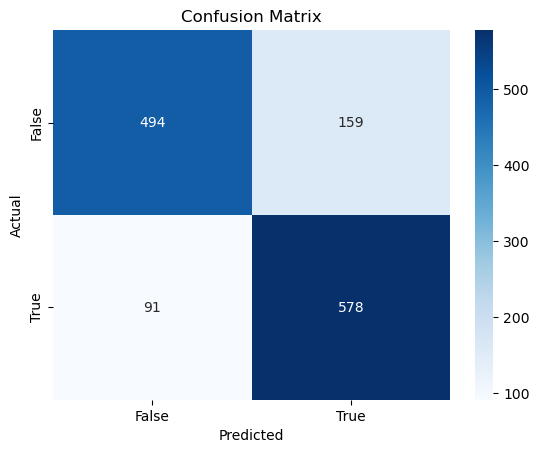

In [27]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_hgb_tuned)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, you can also label the confusion matrix for better clarity
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix for better visualization
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Conclusion: Comparison Between Tuned and Untuned Models

Initial Model (Before Tuning):

The HistGradientBoostingClassifier trained without hyperparameter tuning had an accuracy of 81.85%.
The precision and recall values for both classes were relatively balanced, but the model showed potential for improving in areas such as recall for the positive class.
While the initial model had strong predictive power, it could have benefited from fine-tuning the hyperparameters to better capture the underlying patterns in the data.
Tuned Model (After Grid Search):

After performing hyperparameter tuning using Grid Search, the accuracy decreased slightly to 81.09%.
However, the precision and recall for the positive class improved, with recall increasing to 0.86, indicating better detection of positive instances (minimizing false negatives).
Precision for the positive class decreased slightly to 0.78, showing that while the model is better at capturing positives, some of those predictions may not be as precise (increased false positives).
The F1-score for the positive class improved to 0.82, demonstrating a more balanced performance between precision and recall.

Key Differences:
The untuned model had slightly higher accuracy, but the tuned model performed better in terms of recall, meaning it identified more positive cases, at the cost of a slight decrease in precision.
The tuned model offers a better trade-off for scenarios where minimizing false negatives (detecting more positives) is more important than precision. In contrast, the untuned model might be better when false positives are more costly.
The tuned model shows improved overall F1-score for the positive class, signaling a better balance in handling the minority class.

In summary, hyperparameter tuning helped improve the model’s ability to detect positive cases, but it slightly impacted overall accuracy and precision. Depending on the application, the tuned model may be preferred for its better handling of the positive class, while the untuned model could be selected for scenarios where overall accuracy is the priority.